#Artificial Intelligence - COMP3411/9814
###Tutorial week 8 - Fuzzy Logic



##Fuzzy Logic

Fuzzy logic is a form of logic that allows for reasoning and decision-making in situations that involve ambiguity, imprecision, or uncertainty. Unlike classical binary logic, which deals with crisp true/false values, fuzzy logic allows for partial truths, represented by values between 0 and 1, which are referred to as degrees of membership.

The framework operates based on fuzzy rules, which use fuzzy information to model relationships between inputs and outputs. These rules are expressed in the form of if-then statements. Fuzzy logic provides a flexible and intuitive method for dealing with uncertainty and imprecision, allowing machines to emulate human-like decision-making and problem-solving processes.


##Fuzzy Logic Controller in Python

In the second experience, we aim at building a fuzzy logic controller to regulate the fuel injection to an engine from two variables used as antecedents: speed and temperature. The domain of each variable is as follows:

* __Speed:__ from 0 to 150.
* __Temperature:__ from 0 to 150.
* __Injection:__ from 0 to 100.

Both input variables use fuzzy values for three ranges, as follows:

* __Low speed:__ A trapezoid membership function equal to one between 0 and 25, and decreasing to zero between 25 and 60.
* __Medium speed:__ A triangular membership function increasing from zero to one between 25 and 75, and decreasing from one to zero between 75 and 125.
* __High speed:__ A trapezoid membership function increasing from zero to one between 60 and 100, and equal to one between 100 and 150.

The temperature variable has the same values for its membership function, i.e., low temperature, medium temperature, and high temperature.
The output variable uses fuzzy values for three ranges as well, this is described next:

* __Low injection:__ A triangular membership function decreasing from one to zero between 0 and 30.
* __Medium injection:__ A triangular membership function increasing from zero to one between 10 and 50, and decreasing from one to zero between 50 and 90.
* __High injection:__ A triangular membership function increasing from zero to one between 70 and 100.

The fuzzy logic controller will implement the following rules:

* IF speed = *medium* AND temperature = *high* THEN injection = *low*.
* IF speed = *low* AND temperature = *low* THEN injection = *high*.
* IF speed = *high* AND temperature = *medium* THEN injection = *low*.


__Exercise__
First, we need to install scikit-fuzzy (or skfuzzy) library.

In [1]:
! pip install -U scikit-fuzzy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 29.9 MB/s  0:00:00


__Section 4.1.1.__ Using *skfuzzy* choose and create the antecedents and consequent for the fuzzy logic controller. For the consequent, use the defuzzification method centroid.

In [2]:
#section 4.1.1
speed = ctrl.Antecedent(np.arange(0, 151, 1), 'Speed')
temperature = ctrl.Antecedent(np.arange(0, 151, 1), 'Temperature')
injection = ctrl.Consequent(np.arange(0, 101, 1), 'Injection', defuzzify_method='centroid')

__Section 4.1.2.__ Build the membership function for each variable, i.e., speed, temperature, and injection.

In [3]:
#section 4.1.2
speed['low'] = fuzz.trapmf(speed.universe, [0, 0, 25, 60])
speed['medium'] = fuzz.trimf(speed.universe, [25, 75, 125])
speed['high'] = fuzz.trapmf(speed.universe, [60, 100, 150, 150])

temperature['low'] = fuzz.trapmf(temperature.universe, [0, 0, 25, 60])
temperature['medium'] = fuzz.trimf(temperature.universe, [25, 75, 125])
temperature['high'] = fuzz.trapmf(temperature.universe, [60, 100, 150, 150])

injection['low'] = fuzz.trimf(injection.universe, [0, 0, 30])
injection['medium'] = fuzz.trimf(injection.universe, [10, 50, 90])
injection['high'] = fuzz.trimf(injection.universe, [70, 100, 100])

__Section 4.1.3.__ Visualise the fuzzy sets for each variable.

/opt/anaconda3/envs/comp_9814_w4/lib/python3.12/site-packages/skfuzzy/control/term.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/opt/anaconda3/envs/comp_9814_w4/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


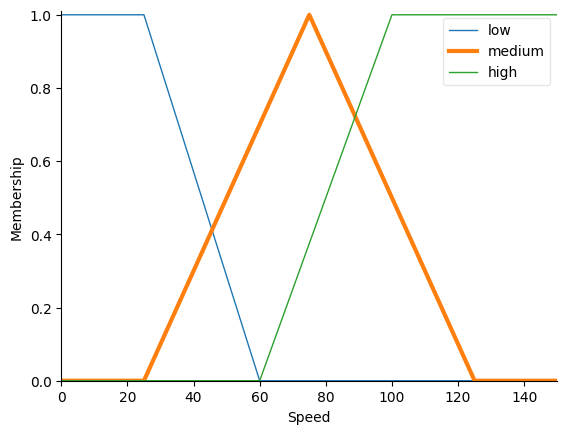

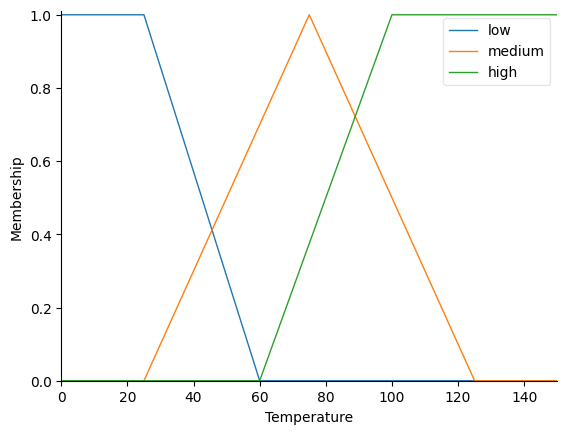

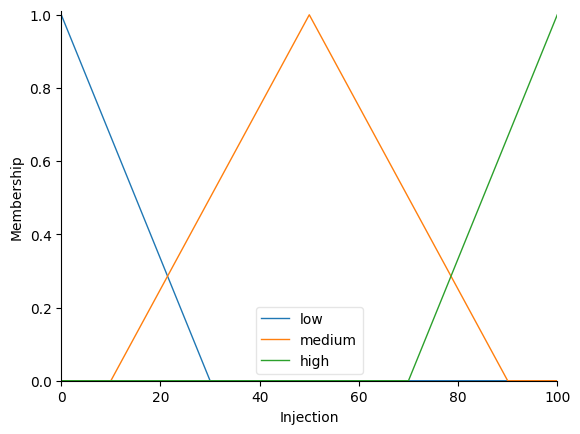

In [4]:
#section 4.1.3
speed['medium'].view()
temperature.view()
injection.view()

__Section 4.1.4.__ Create the rules implemented by the controller.

In [5]:
#section 4.1.4 rules definition
rule1 = ctrl.Rule(speed['medium'] & temperature['high'], injection['low']) #rule6
rule2 = ctrl.Rule(speed['low'] & temperature['low'], injection['high']) #rule1
rule3 = ctrl.Rule(speed['high'] & temperature['medium'], injection['low']) #rule8

__Section 4.1.5.__ Using the rules, create the controller and a control simulator.

In [6]:
#section 4.1.5 create controller and control simulator
injection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
# Uncomment for section 4.1.7
# injection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

injection_sim = ctrl.ControlSystemSimulation(injection_ctrl)

__Section 4.1.6.__ Test the controller with a couple of speeds and temperatures and visualise the output.
* Test 1: speed = 50, temperature = 10.
* Test 2: speed = 70, temperature = 100.


87.02380952380955
10.090909090909088


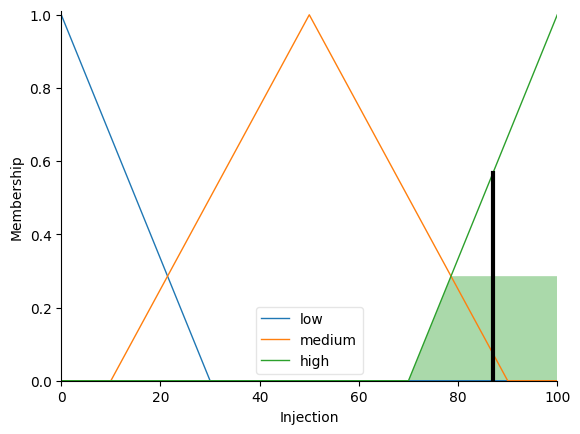

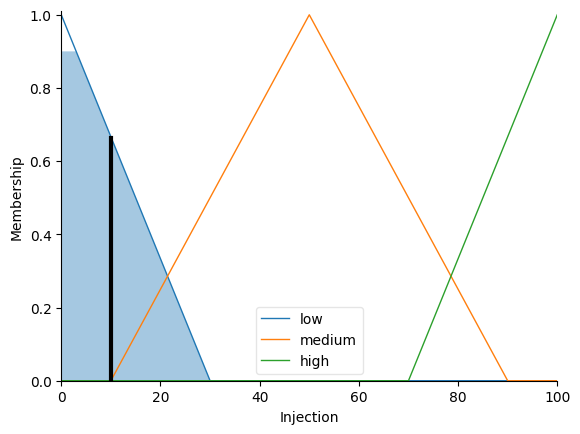

In [7]:
#section 4.1.6
#Test 1
injection_sim.input['Speed'] = 50
injection_sim.input['Temperature'] = 10
injection_sim.compute()

#Results and visualization.
print(injection_sim.output['Injection'])
injection.view(sim=injection_sim)

#Test 2
injection_sim.input['Speed'] = 70
injection_sim.input['Temperature'] = 100
injection_sim.compute()

#Results and visualization.
print(injection_sim.output['Injection'])
injection.view(sim=injection_sim)

__Section 4.1.7.__ Add the following rules to have a full definition of the controller:
* IF speed = *low* AND temperature = *medium* THEN injection = *high*.
* IF speed = *low* AND temperature = *high* THEN injection = *medium*.
* IF speed = *medium* AND temperature = *low* THEN injection = *high*.
* IF speed = *medium* AND temperature = *medium* THEN injection = *medium*.
* IF speed = *high* AND temperature = *low* THEN injection = *medium*.
* IF speed = *high* AND temperature = *high* THEN injection = *low*.

In [8]:
#section 4.1.7
rule1 = ctrl.Rule(speed['low'] & temperature['low'], injection['high'])
rule2 = ctrl.Rule(speed['low'] & temperature['medium'], injection['high'])
rule3 = ctrl.Rule(speed['low'] & temperature['high'], injection['medium'])

rule4 = ctrl.Rule(speed['medium'] & temperature['low'], injection['high'])
rule5 = ctrl.Rule(speed['medium'] & temperature['medium'], injection['medium'])
rule6 = ctrl.Rule(speed['medium'] & temperature['high'], injection['low'])

rule7 = ctrl.Rule(speed['high'] & temperature['low'], injection['medium'])
rule8 = ctrl.Rule(speed['high'] & temperature['medium'], injection['low'])
rule9 = ctrl.Rule(speed['high'] & temperature['high'], injection['low'])

#Create again the controller and a control simulator.
injection_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
injection_sim = ctrl.ControlSystemSimulation(injection_ctrl)

__Section 4.1.8__ Plot the surface of the controller for both input variables: speed and temperature.

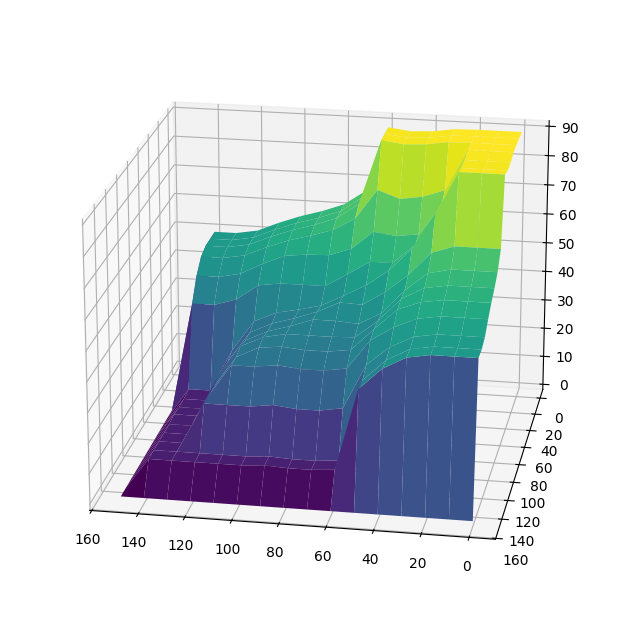

In [9]:
#section 4.1.8
upsampled = np.linspace(0, 150, 16)
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

#collect injections for the control surface
for i in range(15):
    for j in range(15):
        injection_sim.input['Speed'] = x[i, j]
        injection_sim.input['Temperature'] = y[i, j]
        injection_sim.compute()
        z[i, j] = injection_sim.output['Injection']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

ax.view_init(20, 100)